In [ ]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, roc_auc_score

# 1. Load data

In [6]:
df = pd.read_csv(r"dataset/app_signup_dataset.csv")

In [7]:
df.sample(5)

,pages_visited,clicks,features_explored,signup_offer_used,referral_flag,video_views,forms_completed,likes_given,search_queries,scroll_depth,age,income,location,time_of_day,device_type,signup_flag,customer_id
5516,123,133,0,250,72,362,150,150,300,1182,18,120000.000000,suburban,afternoon,tablet,0,11150
9060,0,94,0,139,80,532,96,150,300,1179,18,119831.298983,urban,night,desktop,0,18106
50316,76,150,91,154,10,354,29,46,239,1112,18,120000.000000,urban,evening,desktop,1,25982
44274,84,123,150,61,50,484,16,0,300,1279,18,119969.098092,rural,morning,mobile,0,88565
41197,150,0,96,250,147,565,91,108,300,1187,42,120000.000000,suburban,afternoon,mobile,0,82512


In [8]:
df.shape

(60000, 17)

# 2. Check data quality

data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pages_visited      60000 non-null  int64  
 1   clicks             60000 non-null  int64  
 2   features_explored  60000 non-null  int64  
 3   signup_offer_used  60000 non-null  int64  
 4   referral_flag      60000 non-null  int64  
 5   video_views        60000 non-null  int64  
 6   forms_completed    60000 non-null  int64  
 7   likes_given        60000 non-null  int64  
 8   search_queries     60000 non-null  int64  
 9   scroll_depth       60000 non-null  int64  
 10  age                60000 non-null  int64  
 11  income             60000 non-null  float64
 12  location           60000 non-null  object 
 13  time_of_day        60000 non-null  object 
 14  device_type        60000 non-null  object 
 15  signup_flag        60000 non-null  int64  
 16  customer_id        600

unique value

In [10]:
df.shape

(60000, 17)

In [11]:
for i in df.columns:
    print('Columns name: ', i)
    print('Unique value: ', df[i].unique())
    print('Count unique value: ', df[i].nunique())
    print('-'*10)

Columns name:  pages_visited
Unique value:  [150   0  32  94 100  87  84  29 105  64  23  68  39 104  56  15  73 125
 144 106  31   4  19  12 139 116  71  21 114 115  36  33 141  66  80 142
  88 108  28  97 146  34  55  14  13   1  61  25 137  79  24 138 103 124
 130  98 113  58 129  75  54 118 109  59  57 131  78  30  22  99  38  67
 145  77  63 107 119  11  89  74  83 135 140  92  82 123 102  85   7  35
  47  49  86  69  76  51 126 133  62  26 122   8  40  37  20  60   9  90
  53 111  93 101  46  91  70  45  96  10  65  17  16 149  41  43 127 143
 148  27  50  44 128 121   6 120 117 147  18 132 112   2 136  95   3  52
  72 134 110   5  48  81  42]
Count unique value:  151
----------
Columns name:  clicks
Unique value:  [ 29 150 145  35 120 138  94  65 146   0   9  10 108  68  33 133  18 126
 149 135 115 107  44  38  75 131 117  83 130  51 144  82  25  96  81 141
  67  34  27  43  45  56  99   4 134  76 125 123 124   2  60  93   6  91
  85  26  53  61 139  46 127  66 110  28 103 106  

missing value

In [12]:
df.isna().sum()

pages_visited        0
clicks               0
features_explored    0
signup_offer_used    0
referral_flag        0
video_views          0
forms_completed      0
likes_given          0
search_queries       0
scroll_depth         0
age                  0
income               0
location             0
time_of_day          0
device_type          0
signup_flag          0
customer_id          0
dtype: int64

basic EDA

In [13]:
df.describe()

,pages_visited,clicks,features_explored,signup_offer_used,referral_flag,video_views,forms_completed,likes_given,search_queries,scroll_depth,age,income,signup_flag,customer_id
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000
mean,87.637667,86.825200,89.541467,180.871850,85.731083,489.678267,87.896517,86.990717,258.77705,1183.60345,46.485733,119959.822894,0.166667,49964.502233
std,58.223519,58.395568,57.958951,72.254772,58.591538,87.049241,58.230050,58.438104,59.48569,107.08066,26.273588,58.710845,0.372681,28856.439402
min,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,0.000000,0.000000,0.00000,749.00000,18.000000,119571.691333,0.000000,1.000000
25%,31.000000,29.000000,34.000000,132.000000,27.000000,430.000000,31.000000,29.000000,230.00000,1112.00000,18.000000,119932.161283,0.000000,24996.500000
50%,98.000000,97.000000,102.000000,201.000000,95.000000,498.000000,99.000000,97.000000,297.00000,1185.00000,46.500000,120000.000000,0.000000,50007.500000
75%,150.000000,150.000000,150.000000,250.000000,150.000000,565.000000,150.000000,150.000000,300.00000,1257.00000,75.000000,120000.000000,0.000000,74881.250000
max,150.000000,150.000000,150.000000,250.000000,150.000000,600.000000,150.000000,150.000000,300.00000,1500.00000,75.000000,120000.000000,1.000000,100000.000000


# 3. Feature engineering

time_of_day

In [14]:
duckdb.query('select distinct time_of_day from df')

┌─────────────┐
│ time_of_day │
│   varchar   │
├─────────────┤
│ night       │
│ morning     │
│ evening     │
│ afternoon   │
└─────────────┘

In [15]:
df = duckdb.query("""
select *
, case when time_of_day = 'morning' then 1 else 0 end time_morning
, case when time_of_day = 'afternoon' then 1 else 0 end time_afternoon
, case when time_of_day = 'evening' then 1 else 0 end time_evening
, case when time_of_day = 'night' then 1 else 0 end time_night
from df
""").to_df()

location

In [16]:
duckdb.query('select distinct location from df')

┌──────────┐
│ location │
│ varchar  │
├──────────┤
│ urban    │
│ rural    │
│ suburban │
└──────────┘

In [17]:
df = duckdb.query("""
select *
, case when location = 'urban' then 1 else 0 end location_urban
, case when location = 'suburban' then 1 else 0 end location_suburban
, case when location = 'rural' then 1 else 0 end location_rural
from df
""").to_df()

device_type

In [18]:
duckdb.query('select distinct device_type from df')

┌─────────────┐
│ device_type │
│   varchar   │
├─────────────┤
│ desktop     │
│ tablet      │
│ mobile      │
└─────────────┘

In [19]:
df = duckdb.query("""
select *
, case when device_type = 'mobile' then 1 else 0 end device_mobile
, case when device_type = 'tablet' then 1 else 0 end device_tablet
, case when device_type = 'desktop' then 1 else 0 end device_desktop
from df
""").to_df()

check na

In [20]:
df.isna().sum()

pages_visited        0
clicks               0
features_explored    0
signup_offer_used    0
referral_flag        0
video_views          0
forms_completed      0
likes_given          0
search_queries       0
scroll_depth         0
age                  0
income               0
location             0
time_of_day          0
device_type          0
signup_flag          0
customer_id          0
time_morning         0
time_afternoon       0
time_evening         0
time_night           0
location_urban       0
location_suburban    0
location_rural       0
device_mobile        0
device_tablet        0
device_desktop       0
dtype: int64

In [21]:
df.fillna(0, inplace=True)

drop unnecessary columns

In [23]:
df.drop(columns = ['customer_id','time_of_day','location','device_type'], inplace = True)

correlation

In [25]:
corr = df.corr()

<Axes: >

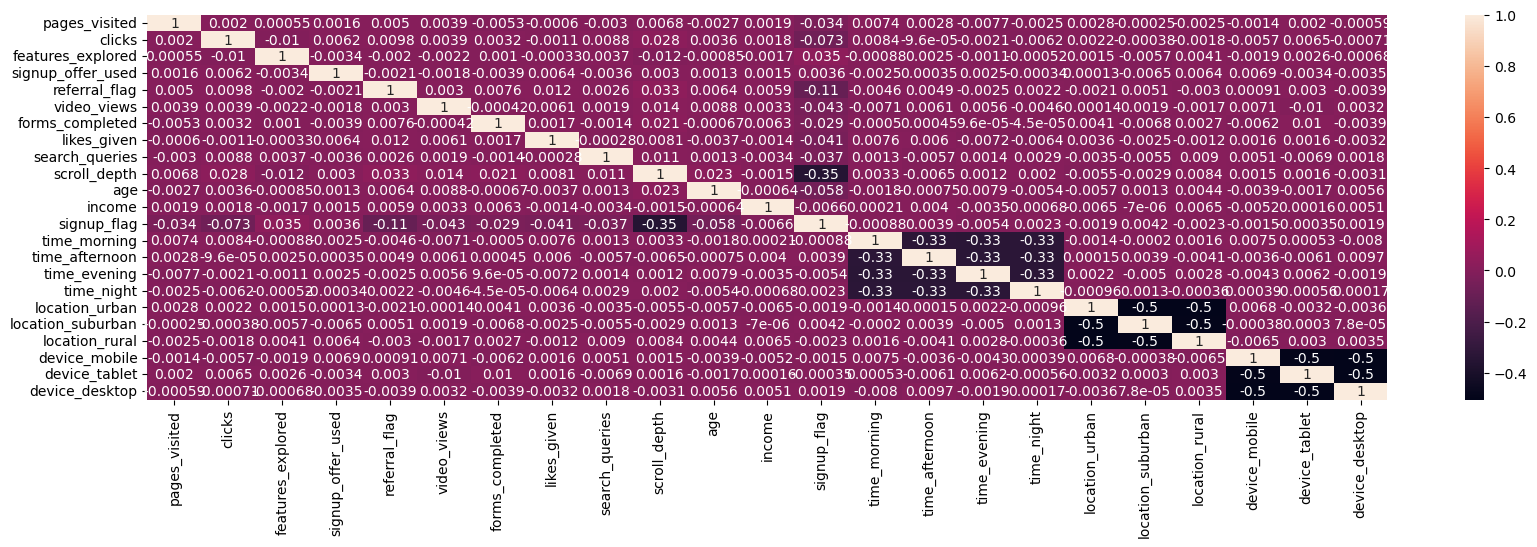

In [26]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, annot=True, ax=ax)

In [27]:
corr_table = corr['signup_flag'].sort_values(ascending=False)

In [28]:
corr_table

signup_flag          1.000000
features_explored    0.035287
location_suburban    0.004206
time_afternoon       0.003942
signup_offer_used    0.003603
time_night           0.002309
device_desktop       0.001876
device_tablet       -0.000348
time_morning        -0.000878
device_mobile       -0.001538
location_urban      -0.001926
location_rural      -0.002280
time_evening        -0.005366
income              -0.006632
forms_completed     -0.029235
pages_visited       -0.033978
search_queries      -0.036566
likes_given         -0.040947
video_views         -0.043106
age                 -0.058012
clicks              -0.072737
referral_flag       -0.105008
scroll_depth        -0.354312
Name: signup_flag, dtype: float64

In [29]:
corr_abs_table = corr['signup_flag'].abs().sort_values(ascending=False)

In [30]:
corr_abs_table

signup_flag          1.000000
scroll_depth         0.354312
referral_flag        0.105008
clicks               0.072737
age                  0.058012
video_views          0.043106
likes_given          0.040947
search_queries       0.036566
features_explored    0.035287
pages_visited        0.033978
forms_completed      0.029235
income               0.006632
time_evening         0.005366
location_suburban    0.004206
time_afternoon       0.003942
signup_offer_used    0.003603
time_night           0.002309
location_rural       0.002280
location_urban       0.001926
device_desktop       0.001876
device_mobile        0.001538
time_morning         0.000878
device_tablet        0.000348
Name: signup_flag, dtype: float64

# 4. Model

train val test split

In [31]:
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [32]:
X_train = train_df.drop(columns=['signup_flag'])
y_train = train_df['signup_flag']

X_val = val_df.drop(columns=['signup_flag'])
y_val = val_df['signup_flag']

X_test = test_df.drop(columns=['signup_flag'])
y_test = test_df['signup_flag']

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(36000, 22)
(36000,)
(12000, 22)
(12000,)
(12000, 22)
(12000,)


In [34]:
y_train.value_counts()

signup_flag
0    30039
1     5961
Name: count, dtype: int64

In [35]:
y_val.value_counts()

signup_flag
0    9975
1    2025
Name: count, dtype: int64

In [36]:
y_test.value_counts()

signup_flag
0    9986
1    2014
Name: count, dtype: int64

1. predicts only 1

In [37]:
dummy_all_churn = DummyClassifier(strategy='constant', constant=1)

In [38]:
dummy_all_churn.fit(X_train, y_train)

DummyClassifier(constant=1, strategy='constant')

2. predicts only 0

In [39]:
dummy_all_not_churn = DummyClassifier(strategy='constant', constant=0)

In [40]:
dummy_all_not_churn.fit(X_train, y_train)

DummyClassifier(constant=0, strategy='constant')

In [41]:
dt = DecisionTreeClassifier(random_state=42)

In [42]:
dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Criterion to split
    'splitter': ['best', 'random'],  # Split strategy
    'max_depth': [None, 10, 20, 30],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples for split
    'min_samples_leaf': [1, 2, 5],  # Minimum samples at leaf
    'max_features': [None, 'sqrt', 'log2'],  # Features considered for split
}

In [43]:
dt_random_search = RandomizedSearchCV(
    dt,
    param_distributions=dt_params,
    n_iter=20,
    cv=3,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)

In [44]:
dt_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='roc_auc')

In [45]:
dt_random_search.best_score_

0.712031044761756

In [46]:
dt_best = dt_random_search.best_estimator_

# 6. Result

In [47]:
models = {
    'Dummy Model (All Register)': dummy_all_churn,
    'Dummy Model (All Not Register)': dummy_all_not_churn,
    'Decision Tree': dt_best
}

In [48]:
summary_metrics = pd.DataFrame(columns=['Model', 'Observation', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'AUCROC'])

In [49]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    model_summary = pd.DataFrame({
        'Model': [model_name],
        'Observation': [len(y_test)],
        'TP': [tp],
        'TN': [tn],
        'FP': [fp],
        'FN': [fn],
        'Precision': [precision],
        'Recall': [recall],
        'AUCROC': [auc_roc]
    })

    summary_metrics = pd.concat([summary_metrics, model_summary], ignore_index=True)

In [50]:
summary_metrics

,Model,Observation,TP,TN,FP,FN,Precision,Recall,AUCROC
0,Dummy Model (All Register),12000,2014,0,9986,0,0.167833,1.000000,0.500000
1,Dummy Model (All Not Register),12000,0,9986,0,2014,NaN,0.000000,0.500000
2,Decision Tree,12000,406,9595,391,1608,0.509410,0.201589,0.734047


# 7. Threshold tunning

In [124]:
# Assume
# Cost of promotion = 100
# Cost of losing customer = 500 (5 times)

In [126]:
cost_promotion = 100
cost_loss = 500
savings_per_customer = 500

In [128]:
thresholds = np.linspace(0, 1, 101)  # 101 thresholds from 0 to 1

In [130]:
best_thresholds = {}
gains_val = {}
gains_test = {}

In [132]:
for model_name, model in models.items():

    model_gains_val = []
    model_gains_test = []

    y_pred_proba = model.predict_proba(X_val)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_pred_proba = y_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_pred_proba = y_pred_proba - 0.1

    model_gains = []
    for threshold in thresholds:
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_val, y_pred)
        costs = (cm[0, 1] * cost_promotion) + (cm[1, 0] * cost_loss)
        savings = cm[1, 1] * savings_per_customer
        gain = savings - costs
        model_gains.append(gain)

    best_threshold_idx = np.argmax(model_gains)
    best_threshold = thresholds[best_threshold_idx]
    
    best_thresholds[model_name] = (best_threshold, max(model_gains))
    gains_val[model_name] = model_gains
    
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_test_pred_proba = y_test_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_test_pred_proba = y_test_pred_proba - 0.1 

    y_test_pred = (y_test_pred_proba > best_threshold).astype(int)
    cm_test = confusion_matrix(y_test, y_test_pred)  
    costs_test = (cm_test[0, 1] * cost_promotion) + (cm_test[1, 0] * cost_loss)
    savings_test = cm_test[1, 1] * savings_per_customer   
    gain_test = savings_test - costs_test

    gains_test[model_name] = gain_test

In [133]:
best_thresholds

{'Dummy Model (All Register)': (0.0, 15000),
 'Dummy Model (All Not Register)': (0.0, -1012500),
 'Decision Tree': (0.09, 156400)}

In [134]:
gains_test

{'Dummy Model (All Register)': 8400,
 'Dummy Model (All Not Register)': -1007000,
 'Decision Tree': 119600}

In [135]:
summary_thresholds = pd.DataFrame(columns=['Model', 'Best Threshold', 'Validation Gain', 'Test Gain'])

In [136]:
for model_name, model_gains_val in gains_val.items():
    best_threshold, _ = best_thresholds[model_name]

    model_summary_thresholds = pd.DataFrame({
        'Model': [model_name],
        'Best Threshold': [best_threshold],
        'Validation Gain': [max(model_gains_val)],
        'Test Gain': [gains_test[model_name]]
    })

    summary_thresholds = pd.concat([summary_thresholds, model_summary_thresholds], ignore_index=True)

In [137]:
summary_thresholds

,Model,Best Threshold,Validation Gain,Test Gain
0,Dummy Model (All Register),0.00,15000,8400
1,Dummy Model (All Not Register),0.00,-1012500,-1007000
2,Decision Tree,0.09,156400,119600


# 8. Result (threshold/cost)

In [145]:
summary_df = pd.merge(summary_metrics, summary_thresholds, on="Model", how="left")

In [147]:
summary_df

,Model,Observation,TP,TN,FP,FN,Precision,Recall,AUCROC,Best Threshold,Validation Gain,Test Gain
0,Dummy Model (All Register),12000,2014,0,9986,0,0.167833,1.000000,0.500000,0.00,15000,8400
1,Dummy Model (All Not Register),12000,0,9986,0,2014,NaN,0.000000,0.500000,0.00,-1012500,-1007000
2,Decision Tree,12000,406,9595,391,1608,0.509410,0.201589,0.734047,0.09,156400,119600
